In [422]:
#importing the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings


In [423]:
#reading the loan.csv data
data=pd.read_csv("data/loan.csv",index_col=0)
count=0
total_missing_value_cols=[]
for col in data.columns:
    if data[col].isnull().sum() == 39717:
        print(col,data[col].isnull().count())
        count+=1
        total_missing_value_cols.append(col)

print(count)

/tmp/ipykernel_41815/3534889629.py:2: DtypeWarning:

Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.



mths_since_last_major_derog 39717
annual_inc_joint 39717
dti_joint 39717
verification_status_joint 39717
tot_coll_amt 39717
tot_cur_bal 39717
open_acc_6m 39717
open_il_6m 39717
open_il_12m 39717
open_il_24m 39717
mths_since_rcnt_il 39717
total_bal_il 39717
il_util 39717
open_rv_12m 39717
open_rv_24m 39717
max_bal_bc 39717
all_util 39717
total_rev_hi_lim 39717
inq_fi 39717
total_cu_tl 39717
inq_last_12m 39717
acc_open_past_24mths 39717
avg_cur_bal 39717
bc_open_to_buy 39717
bc_util 39717
mo_sin_old_il_acct 39717
mo_sin_old_rev_tl_op 39717
mo_sin_rcnt_rev_tl_op 39717
mo_sin_rcnt_tl 39717
mort_acc 39717
mths_since_recent_bc 39717
mths_since_recent_bc_dlq 39717
mths_since_recent_inq 39717
mths_since_recent_revol_delinq 39717
num_accts_ever_120_pd 39717
num_actv_bc_tl 39717
num_actv_rev_tl 39717
num_bc_sats 39717
num_bc_tl 39717
num_il_tl 39717
num_op_rev_tl 39717
num_rev_accts 39717
num_rev_tl_bal_gt_0 39717
num_sats 39717
num_tl_120dpd_2m 39717
num_tl_30dpd 39717
num_tl_90g_dpd_24m 39717


In [424]:
data.shape
data_reformed=data.copy()
data_reformed=data_reformed.drop(total_missing_value_cols,axis=1)

In [425]:
data_reformed.shape
data_reformed.isnull().sum().sort_values(ascending=False)
cols_with_above_30_null_values=[]
for col in data_reformed.columns:
    missing_val_perc=100*(data_reformed[col].isnull().sum()/data_reformed.shape[0])
    if missing_val_perc>30:
        print("{} column with {}% missing values".format(col,missing_val_perc))
        cols_with_above_30_null_values.append(col)

desc column with 32.58050708764509% missing values
mths_since_last_delinq column with 64.66248709620565% missing values
mths_since_last_record column with 92.98537150338646% missing values
next_pymnt_d column with 97.12969257496789% missing values


In [426]:

data_reformed=data_reformed.drop(cols_with_above_30_null_values,axis=1)

In [427]:
data_reformed.shape

(39717, 52)

In [428]:
missing_perc=round(100*(data_reformed.isnull().sum()/data_reformed.shape[0]),3)
missing_perc[missing_perc>0]

emp_title                     6.191
emp_length                    2.707
title                         0.028
revol_util                    0.126
last_pymnt_d                  0.179
last_credit_pull_d            0.005
collections_12_mths_ex_med    0.141
chargeoff_within_12_mths      0.141
pub_rec_bankruptcies          1.755
tax_liens                     0.098
dtype: float64

In [429]:
def print_unique_valuecount(df,col):
    print(f'{col} with {len(df[col].unique())} number of unique values')
cols=["emp_title","emp_length","title","revol_util","last_pymnt_d",
      "last_credit_pull_d","collections_12_mths_ex_med",
      "chargeoff_within_12_mths","pub_rec_bankruptcies","tax_liens"]
for col in cols:
    print_unique_valuecount(data_reformed,col)


emp_title with 28821 number of unique values
emp_length with 12 number of unique values
title with 19616 number of unique values
revol_util with 1090 number of unique values
last_pymnt_d with 102 number of unique values
last_credit_pull_d with 107 number of unique values
collections_12_mths_ex_med with 2 number of unique values
chargeoff_within_12_mths with 2 number of unique values
pub_rec_bankruptcies with 4 number of unique values
tax_liens with 2 number of unique values


In [430]:
data_reformed.nunique().sort_values(ascending=False)

member_id                     39717
url                           39717
total_pymnt                   37850
total_pymnt_inv               37518
total_rec_int                 35148
last_pymnt_amnt               34930
emp_title                     28820
revol_bal                     21711
title                         19615
installment                   15383
funded_amnt_inv                8205
total_rec_prncp                7976
annual_inc                     5318
recoveries                     4040
dti                            2868
collection_recovery_fee        2616
total_rec_late_fee             1356
out_prncp_inv                  1138
out_prncp                      1137
revol_util                     1089
funded_amnt                    1041
loan_amnt                       885
zip_code                        823
earliest_cr_line                526
int_rate                        371
last_credit_pull_d              106
last_pymnt_d                    101
total_acc                   

We are observing that the columnns namely
acc_now_delinq,
delinq_amnt,
chargeoff_within_12_mths,
initial_list_status,
application_type,
policy_code,
collections_12_mths_ex_med,
pymnt_plan,
tax_liens

are categorical variables with only one unique value which doesn't provide much to the analysis of the loan status both in the case of univariate and bivariate analysis
so we can remove these columns

Also member_id and url variable are total unique values and we can remove them as well


In [431]:
cols_to_be_removed=["acc_now_delinq", "delinq_amnt", "chargeoff_within_12_mths",
                    "initial_list_status", "application_type", "policy_code"
                    , "collections_12_mths_ex_med", "pymnt_plan", "tax_liens","member_id","url"]
data_reformed=data_reformed.drop(cols_to_be_removed,axis=1)
data_reformed.shape

(39717, 41)

In [432]:
data_reformed.to_csv("data/semi_cleaned_loan.csv",encoding="utf-8",index=False)

# Analysis


In [433]:
cleaned_df=pd.read_csv("data/semi_cleaned_loan.csv")

In [434]:
cleaned_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Deleting the columns which are related to Applicants demographics and 


In [435]:
cleaned_df.tail(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39697,10000,10000,400.0,36 months,10.28%,323.98,C,C1,RoadNarrows Robotics,< 1 year,...,466.52,10000.0,1662.89,0.0,0.0,0.0,Jul-10,328.93,Oct-10,NaN
39698,5000,5000,675.0,36 months,9.01%,159.03,B,B2,Viget Labs,1 year,...,772.88,5000.0,725.02,0.0,0.0,0.0,Jul-10,160.02,Jul-10,NaN
39699,5100,5100,575.0,36 months,8.38%,160.72,A,A5,Northwestern School Corporation,4 years,...,651.56,5100.0,679.03,0.0,0.0,0.0,Apr-10,638.15,Jun-07,NaN
39700,5400,5400,200.0,36 months,7.75%,168.60,A,A3,NaN,< 1 year,...,224.80,5400.0,669.34,0.0,0.0,0.0,Jul-10,169.09,Dec-13,NaN
39701,5300,5300,600.0,36 months,8.38%,167.02,A,A5,Peerless Pump Company,7 years,...,680.67,5300.0,712.56,0.0,0.0,0.0,Jul-10,170.05,Jul-10,NaN
39702,5000,5000,850.0,36 months,11.22%,164.23,C,C4,Self-employed,1 year,...,1005.05,5000.0,912.05,0.0,0.0,0.0,Jul-10,166.25,Oct-12,NaN
39703,3000,3000,2550.0,36 months,10.28%,97.20,C,C1,Oracle,2 years,...,2974.03,3000.0,498.86,0.0,0.0,0.0,Jul-10,98.49,Feb-13,NaN
39704,3000,3000,950.0,36 months,8.70%,94.98,B,B1,NaN,< 1 year,...,1082.73,3000.0,419.14,0.0,0.0,0.0,Jul-10,97.45,Jul-10,NaN
39705,5000,5000,250.0,36 months,7.43%,155.38,A,A2,MetraTech,8 years,...,279.69,5000.0,593.63,0.0,0.0,0.0,Jul-10,157.02,Jun-10,NaN
39706,5000,5000,150.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,169.38,5000.0,645.96,0.0,0.0,0.0,Jul-10,157.31,Jun-07,NaN


Deleting the Applicants customer behaviout variables

In [436]:
cleaned_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [437]:
cols_cust_behaviour=["open_acc","pub_rec","revol_util",
                     "total_acc","out_prncp","out_prncp_inv",
                     "out_prncp_inv","total_pymnt","total_pymnt_inv",
                     "total_rec_int","total_rec_late_fee",
                     "recoveries","collection_recovery_fee","last_pymnt_d",
                     "last_pymnt_amnt","last_credit_pull_d","inq_last_6mths","delinq_2yrs"]
cleaned_df=cleaned_df.drop(cols_cust_behaviour,axis=1)

In [438]:
cleaned_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,revol_bal,total_rec_prncp,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,Fully Paid,credit_card,Computer,860xx,AZ,27.65,Jan-85,13648,5000.00,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,Charged Off,car,bike,309xx,GA,1.00,Apr-99,1687,456.46,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,Fully Paid,small_business,real estate business,606xx,IL,8.72,Nov-01,2956,2400.00,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Fully Paid,other,personel,917xx,CA,20.00,Feb-96,5598,10000.00,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,Current,other,Personal,972xx,OR,17.94,Jan-96,27783,2475.94,0.0


In [439]:
total = cleaned_df.isnull().sum().sort_values(ascending=False)
percent = (cleaned_df.isnull().sum()/cleaned_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
title,11,0.000277
issue_d,0,0.000000
total_rec_prncp,0,0.000000
revol_bal,0,0.000000
earliest_cr_line,0,0.000000
dti,0,0.000000
addr_state,0,0.000000


In [440]:
cleaned_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [441]:
cleaned_df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [442]:
cleaned_df.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [443]:
cleaned_df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
revol_bal                  0
total_rec_prncp            0
pub_rec_bankruptcies     697
dtype: int64

We are assuming that the missing emp_title data is self-employed persons

we can fill the missing tilte as None

we can fill the emp_length with the median value

we can fill the pub_rec_bankruptcies with median value


In [444]:
cleaned_df.emp_length.fillna("None",inplace=True)
cleaned_df.emp_title.fillna("self-employed",inplace=True)
cleaned_df.pub_rec_bankruptcies.fillna(0.0,inplace=True)
cleaned_df.title.fillna("None",inplace=True)

In [445]:
cleaned_df.isnull().sum()
cleaned_loan_df=cleaned_df.copy()

<AxesSubplot:>

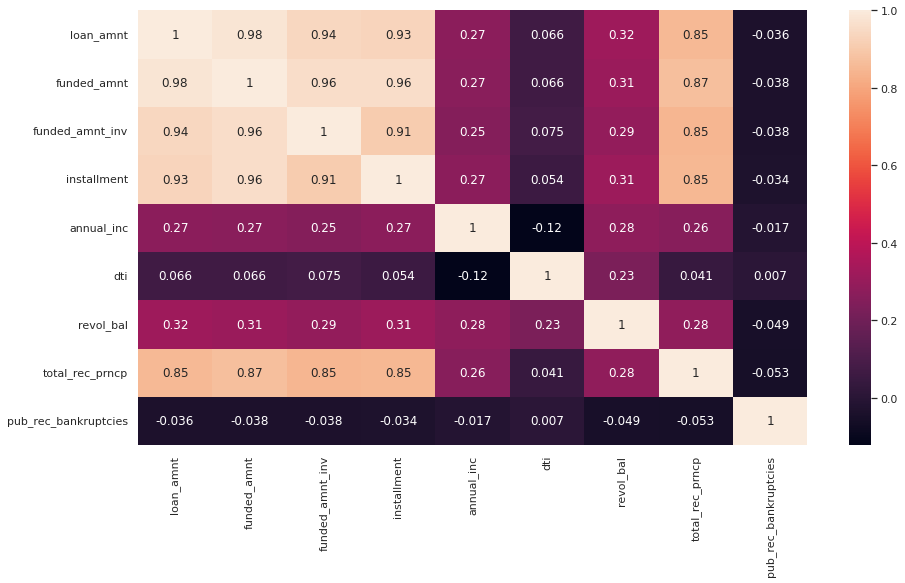

In [446]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cleaned_df.corr(),annot=True)


In [447]:

cleaned_loan_df=cleaned_loan_df[~(cleaned_loan_df["loan_status"]=="Current")]

cleaned_loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

# Data Analysis


## Univariate Analysis and segmented Univariate

Taking into account the target variable


<AxesSubplot:xlabel='loan_status', ylabel='count'>

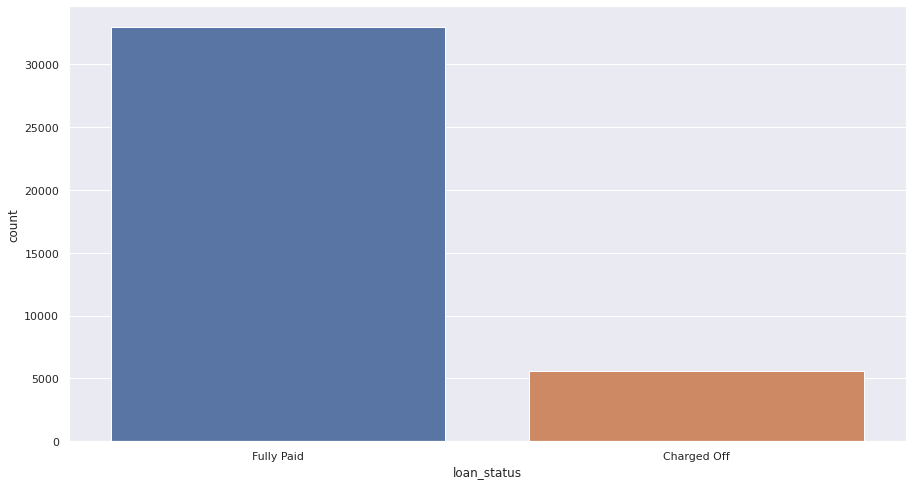

In [448]:
#BarPlot against the count of the target variable
#loan_amnt,int_rate,term,grade,sub_grade,annual_income,purpose,DTI,emp_length,loan_date(mon),home_ownership,verification_stat

sns.countplot(data=cleaned_loan_df, x="loan_status")


In [449]:
#converting the loan_status to boolean vars for better analysis
cleaned_loan_df["loan_status"]=cleaned_loan_df["loan_status"].apply(lambda x: 0 if x=="Fully Paid" else 1)

### We notice that the charged off value for the loans is approximately about 14% of the total data.


<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

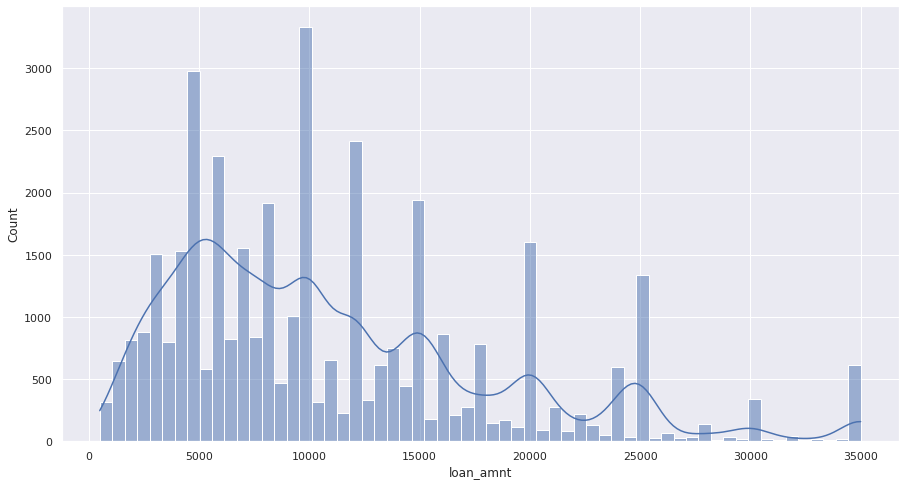

In [450]:
sns.histplot(data=cleaned_loan_df,x="loan_amnt",kde=True)

In [451]:
cleaned_loan_df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

upper bound of the loan amount is 29.55k

In [452]:
cleaned_loan_df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
revol_bal               0
total_rec_prncp         0
pub_rec_bankruptcies    0
dtype: int64

In [453]:
cleaned_loan_df.issue_d.head(20)

0     Dec-11
1     Dec-11
2     Dec-11
3     Dec-11
5     Dec-11
6     Dec-11
7     Dec-11
8     Dec-11
9     Dec-11
10    Dec-11
11    Dec-11
12    Dec-11
13    Dec-11
14    Dec-11
15    Dec-11
16    Dec-11
17    Dec-11
18    Dec-11
19    Dec-11
20    Dec-11
Name: issue_d, dtype: object

Creating derived categorical columns against the DTI column,issue date of loan, loan amount, 


In [454]:
cleaned_loan_df["issue_month"]=cleaned_loan_df["issue_d"].apply(lambda x: x.split("-")[0])

In [455]:
cleaned_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,purpose,title,zip_code,addr_state,dti,earliest_cr_line,revol_bal,total_rec_prncp,pub_rec_bankruptcies,issue_month
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,self-employed,10+ years,...,credit_card,Computer,860xx,AZ,27.65,Jan-85,13648,5000.00,0.0,Dec
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,car,bike,309xx,GA,1.00,Apr-99,1687,456.46,0.0,Dec
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,self-employed,10+ years,...,small_business,real estate business,606xx,IL,8.72,Nov-01,2956,2400.00,0.0,Dec
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,other,personel,917xx,CA,20.00,Feb-96,5598,10000.00,0.0,Dec
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,Nov-04,7963,5000.00,0.0,Dec


For some of the continuous variables like loan_amnt, int_rate, dti, annual_income, we will create categorical variables for our analysis according to bins with respect to quartile ranges


In [456]:
#transform int_rate column
cleaned_loan_df.int_rate.describe()
cleaned_loan_df.int_rate=cleaned_loan_df.int_rate.apply(lambda x : float(x.strip("%")))

In [457]:
cleaned_loan_df.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

Creating box plot to identify outliers

<AxesSubplot:xlabel='int_rate'>

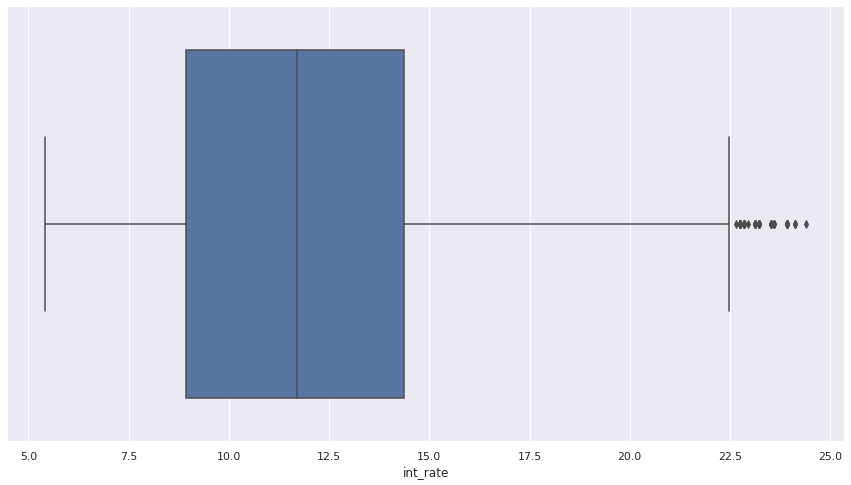

In [458]:
sns.boxplot(data=cleaned_loan_df,x="int_rate")

We observe that the upperbound for the int_rate column is around 21.5

In [459]:
#creating bin out of the int_rate
#removing outliers
cleaned_loan_df=cleaned_loan_df[cleaned_loan_df["int_rate"]<=21.5]
cleaned_loan_df["int_rate_cat"]=pd.qcut(cleaned_loan_df.int_rate,q=5,labels=["low","medium-low","medium","medium-high","high"])

In [460]:
#creating 
cleaned_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,title,zip_code,addr_state,dti,earliest_cr_line,revol_bal,total_rec_prncp,pub_rec_bankruptcies,issue_month,int_rate_cat
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,self-employed,10+ years,...,Computer,860xx,AZ,27.65,Jan-85,13648,5000.00,0.0,Dec,medium-low
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,bike,309xx,GA,1.00,Apr-99,1687,456.46,0.0,Dec,high
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,self-employed,10+ years,...,real estate business,606xx,IL,8.72,Nov-01,2956,2400.00,0.0,Dec,high
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,personel,917xx,CA,20.00,Feb-96,5598,10000.00,0.0,Dec,medium-high
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,My wedding loan I promise to pay back,852xx,AZ,11.20,Nov-04,7963,5000.00,0.0,Dec,low


In [461]:
cleaned_loan_df.dti.describe()

count    38341.000000
mean        13.266524
std          6.676121
min          0.000000
25%          8.130000
50%         13.360000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti'>

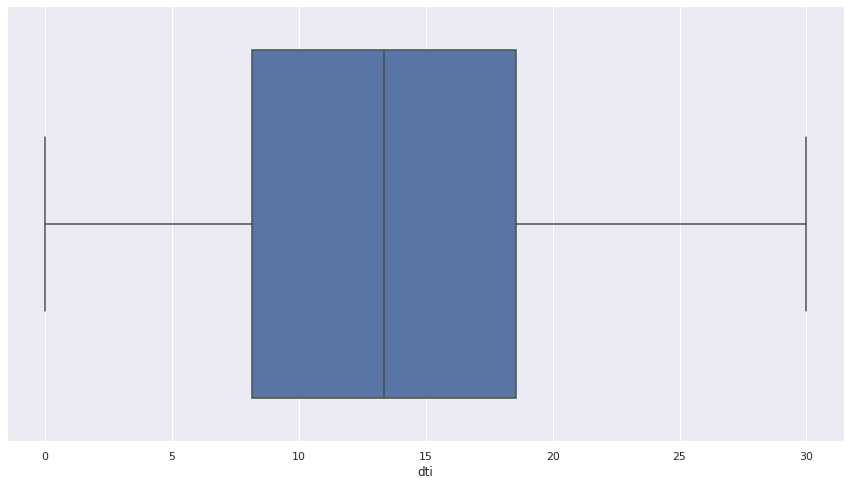

In [462]:
sns.boxplot(data=cleaned_loan_df,x="dti")

<AxesSubplot:xlabel='dti', ylabel='Count'>

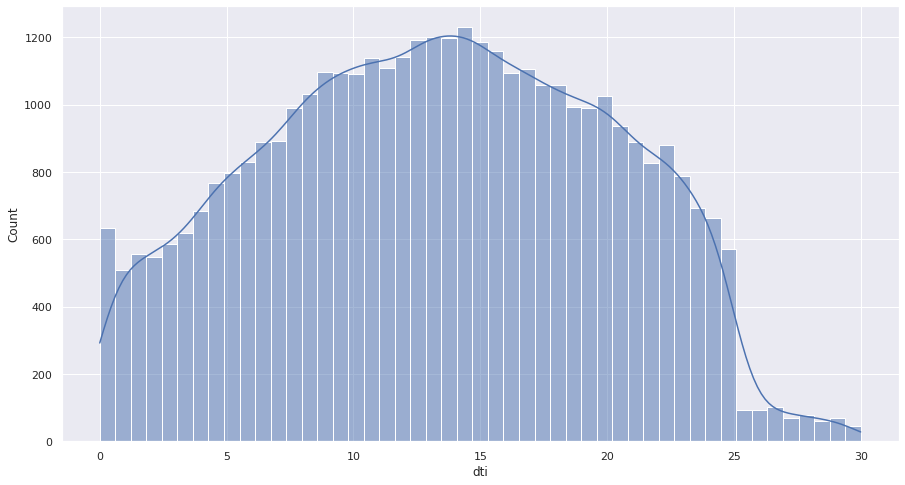

In [463]:
sns.histplot(data=cleaned_loan_df,x="dti",kde=True)

lets classify the dti variable as low, medium and high according to quartile ranges


In [464]:
cleaned_loan_df["dti_cat"]=pd.qcut(cleaned_loan_df.dti,q=3,labels=["low","medium","high"])

In [465]:
np.quantile(cleaned_loan_df.dti,[0,.3,.6,.9])

array([ 0.  ,  9.23, 15.31, 22.29])

In [466]:
cleaned_loan_df.annual_inc.describe()

count    3.834100e+04
mean     6.859605e+04
std      6.411033e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.834400e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

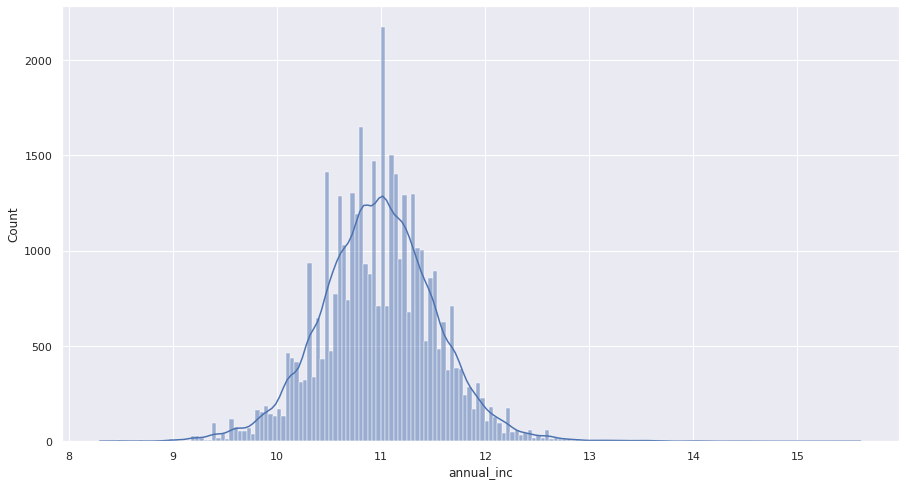

In [467]:
log_normal_annual_inc=np.log(cleaned_df.annual_inc)
sns.histplot(log_normal_annual_inc,kde=True)

### Creating a log normal distribution from the annual_inc variable for creating better categorical variable


In [468]:
cleaned_loan_df["annual_inc_cat"]=pd.qcut(log_normal_annual_inc,q=3,labels=["high","medium","low"])

In [469]:
np.quantile(log_normal_annual_inc,[0,.3,.6,.9])

array([ 8.29404964, 10.71441777, 11.09504964, 11.66134547])

In [470]:
cleaned_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,addr_state,dti,earliest_cr_line,revol_bal,total_rec_prncp,pub_rec_bankruptcies,issue_month,int_rate_cat,dti_cat,annual_inc_cat
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,self-employed,10+ years,...,AZ,27.65,Jan-85,13648,5000.00,0.0,Dec,medium-low,high,high
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,GA,1.00,Apr-99,1687,456.46,0.0,Dec,high,low,high
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,self-employed,10+ years,...,IL,8.72,Nov-01,2956,2400.00,0.0,Dec,high,low,high
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,CA,20.00,Feb-96,5598,10000.00,0.0,Dec,medium-high,high,medium
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,AZ,11.20,Nov-04,7963,5000.00,0.0,Dec,low,medium,high


In [471]:
cleaned_loan_df.to_csv("data\cleaned_loan.csv",encoding="utf-8",index=False)

In [472]:
Analysis_data=pd.read_csv("data\cleaned_loan.csv")

In [473]:
def plot_vs_perc_defaulters(df,xlabel,col):
    category_df = (cleaned_loan_df.groupby([col]).loan_status.sum() * 
                            100 / cleaned_loan_df.groupby([col]).loan_status.count())
    loan_amnt_category_df.plot(kind = "bar",xlabel=xlabel,ylabel="% of Defaulters")

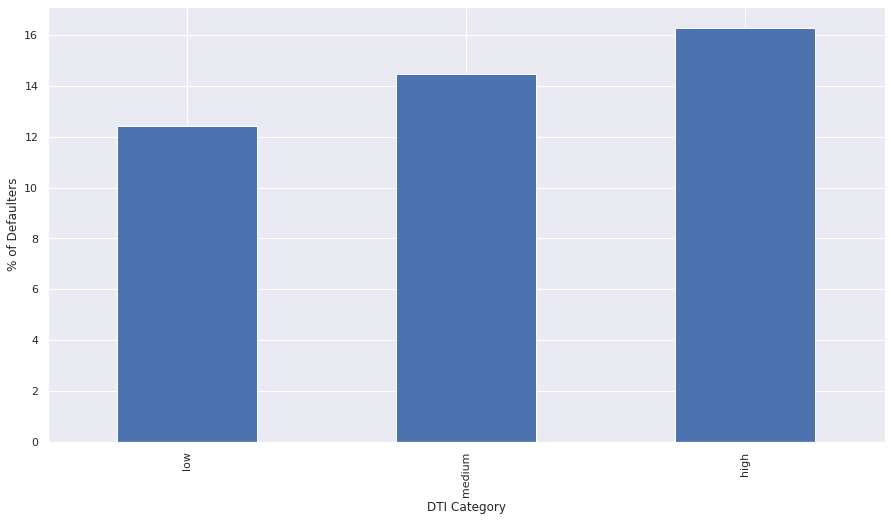

In [474]:
plot_vs_perc_defaulters(Analysis_data,"DTI Category","dti_cat")

Observation- Higher the debt to income ratio higher the defaulting rate


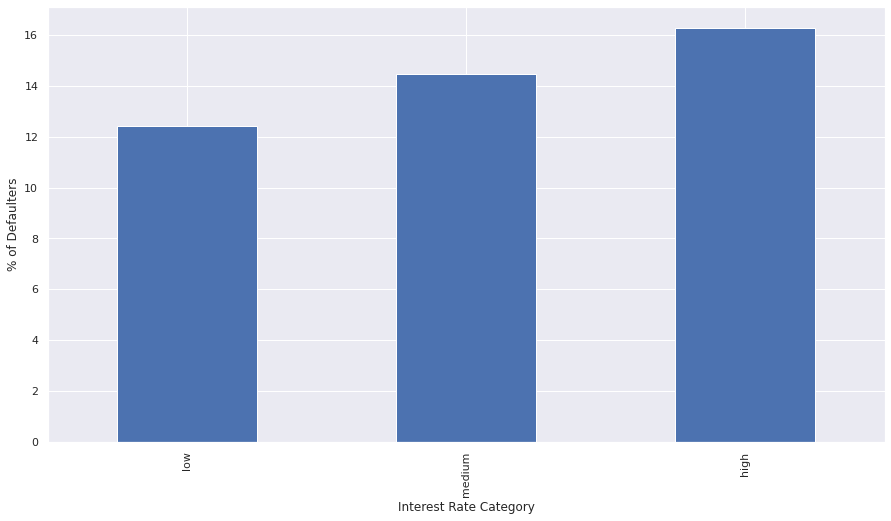

In [475]:

plot_vs_perc_defaulters(Analysis_data,"Interest Rate Category","int_rate_cat")

<AxesSubplot:xlabel='Annual Income Category', ylabel='% of Defaulters'>

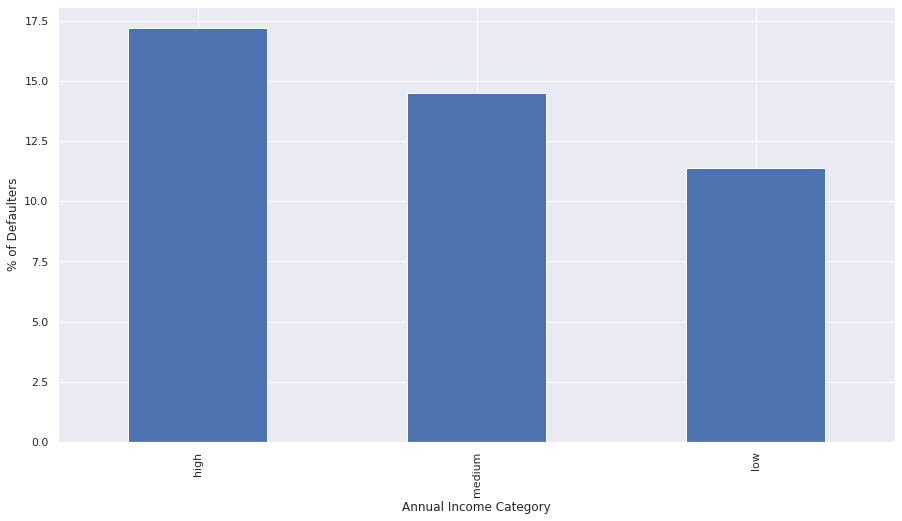

In [476]:
Annual_Income_category_df = (cleaned_loan_df.groupby(['annual_inc_cat']).loan_status.sum() * 
                            100 / cleaned_loan_df.groupby(['annual_inc_cat']).loan_status.count())
Annual_Income_category_df.plot(kind = "bar",xlabel="Annual Income Category",ylabel="% of Defaulters")

<AxesSubplot:xlabel='Purpose Category', ylabel='% of Defaulters'>

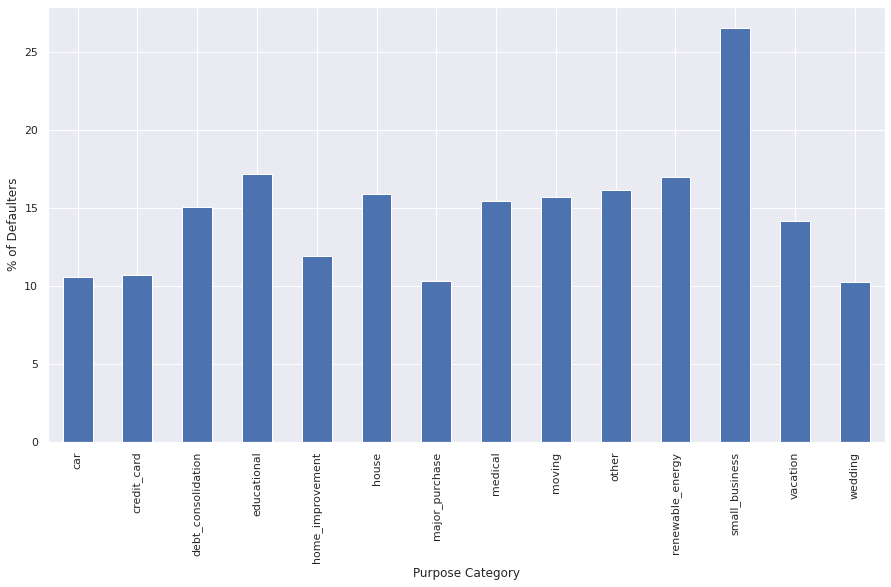

In [477]:
purpose_df = (cleaned_loan_df.groupby(['purpose']).loan_status.sum() * 
                            100 / cleaned_loan_df.groupby(['purpose']).loan_status.count())
purpose_df.plot(kind = "bar",xlabel="Purpose Category",ylabel="% of Defaulters")

observation- for small business category the amount of default rate is much higher than the rest

% of Defaulters based on the issue month


<AxesSubplot:xlabel='Issue Month', ylabel='% of Defaulters'>

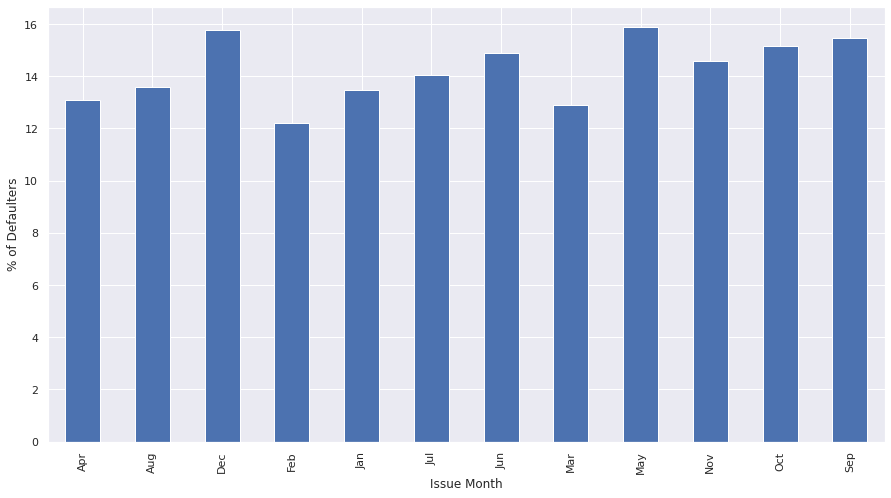

In [478]:
issue_month_df = (cleaned_loan_df.groupby(['issue_month']).loan_status.sum() * 
                            100 / cleaned_loan_df.groupby(['issue_month']).loan_status.count())
issue_month_df.plot(kind = "bar",xlabel="Issue Month",ylabel="% of Defaulters")

based on terms

<AxesSubplot:xlabel='term', ylabel='% of Defaulters'>

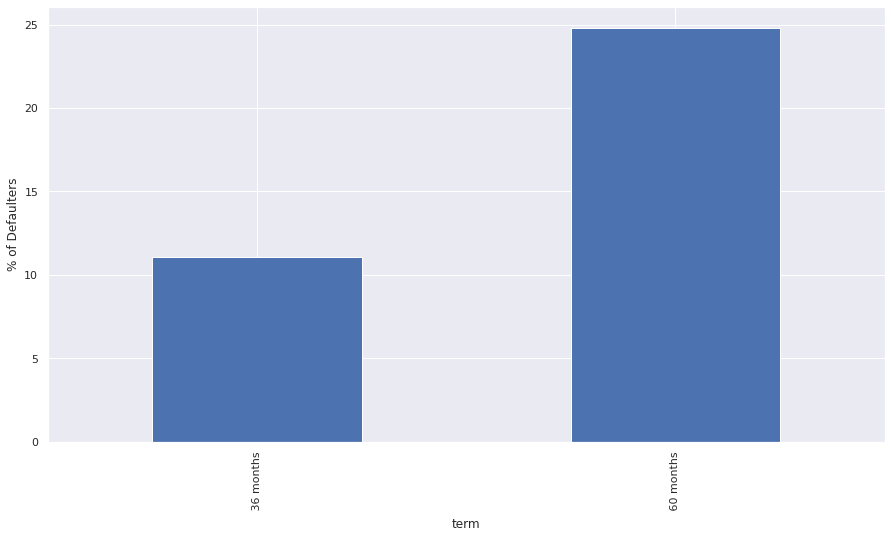

In [479]:
term= (cleaned_loan_df.groupby(['term']).loan_status.sum() * 
                            100 / cleaned_loan_df.groupby(['term']).loan_status.count())
term.plot(kind = "bar",xlabel="term",ylabel="% of Defaulters")

<AxesSubplot:xlabel='grade', ylabel='% of Defaulters'>

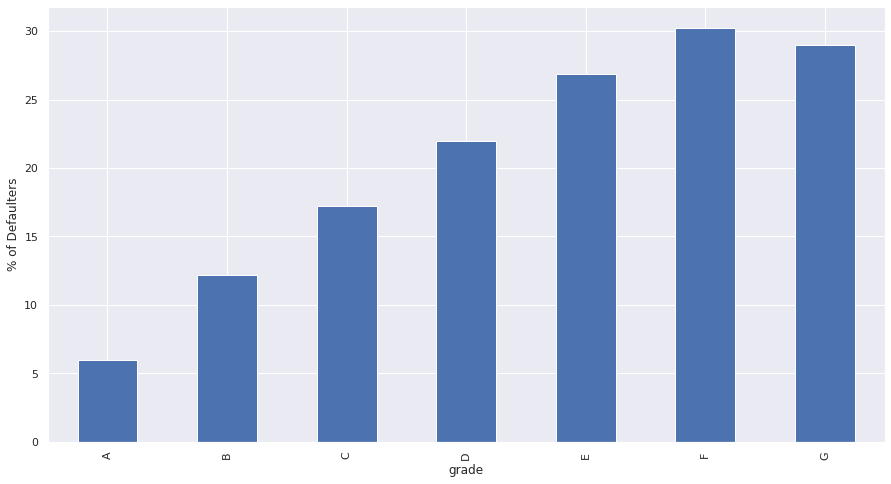

In [480]:
grade= (cleaned_loan_df.groupby(['grade']).loan_status.sum() * 
                            100 / cleaned_loan_df.groupby(['grade']).loan_status.count())
grade.plot(kind = "bar",xlabel="grade",ylabel="% of Defaulters")

<AxesSubplot:xlabel='Sub_Grade', ylabel='% of Defaulters'>

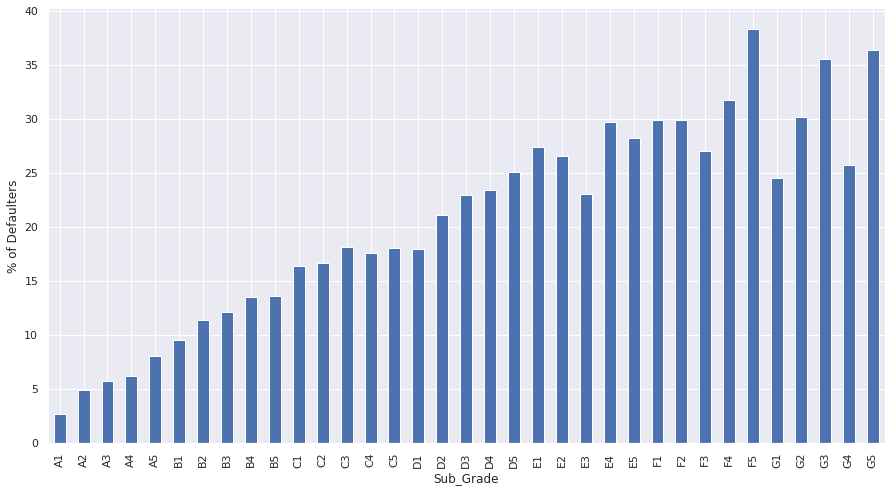

In [481]:
sub_grade= (cleaned_loan_df.groupby(['sub_grade']).loan_status.sum() * 
                            100 / cleaned_loan_df.groupby(['sub_grade']).loan_status.count())
sub_grade.plot(kind = "bar",xlabel="Sub_Grade",ylabel="% of Defaulters")

<AxesSubplot:xlabel='Verification Status', ylabel='% of Defaulters'>

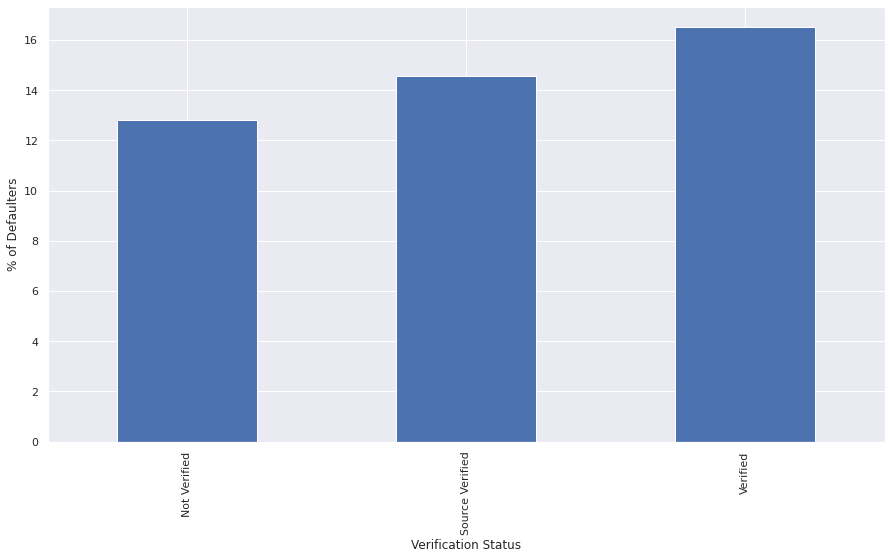

In [482]:
verification_stat_df= (cleaned_loan_df.groupby(['verification_status']).loan_status.sum() * 
                            100 / cleaned_loan_df.groupby(['verification_status']).loan_status.count())
verification_stat_df.plot(kind = "bar",xlabel="Verification Status",ylabel="% of Defaulters")

<AxesSubplot:xlabel='Employment Length', ylabel='% of Defaulters'>

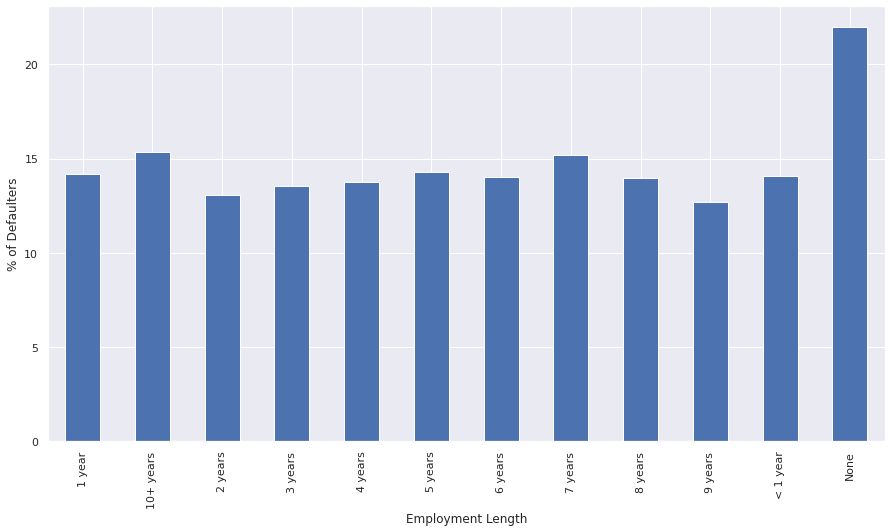

In [483]:
emp_length_df= (cleaned_loan_df.groupby(['emp_length']).loan_status.sum() * 
                            100 / cleaned_loan_df.groupby(['emp_length']).loan_status.count())
emp_length_df.plot(kind = "bar",xlabel="Employment Length",ylabel="% of Defaulters")

In [484]:
cleaned_loan_df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       'None'], dtype=object)